# Como era esperado que as práticas primárias do XP fossem aplicadas? 

Sabemos que o tempo era muito curto para concepção e desenvolvimento de 5 RQs, mas o uso de algumas práticas primárias ajudaria a otimizar o tempo da aula e maximizar o valor do artefato entregue:

- Era importante a dupla reservar alguns minutos no início da aula para planejar o trabalho, aplicando assim o Jogo do Planejamento. Algumas decisões que poderiam ser tomadas nesse momento: considerando o tempo da aula e a natureza da tarefa, deveriam implementar algum teste? Considerando a experiência dos membros da equipe com Python, quem deveria ser o piloto na programação em pares?

- Escrever juntos as RQs considerando a complexidade no desenvolvimento e o conhecimento/experiência dos membros da dupla para executar. Essa ação abrange a Propriedade Coletiva e Projeto Simples, por exemplo.

- Se aproveitar da presença da cliente para definir quais eram as RQs mais relevantes e, assim, priorizar o trabalho de acordo com o tempo da aula. Isso garantiria que, caso a dupla não tivesse tempo de entregar as 5 RQs, ao menos entregariam as mais importantes.

- Ler todo o material sobre o projeto para garantir que a dupla conseguiu entender a proposta e, caso necessário, conversar com a cliente para tirar dúvidas sobre o objetivo do projeto e tarefa. Isso garantiria por exemplo que vocês propusessem RQs mais simples e, ainda assim, relevantes para o contexto do projeto. De quebra ainda aplicariam 3 práticas: Cliente Acessível, Projeto Simples e Propriedade Coletiva.

Caso tenham alguma dúvida sobre o uso das práticas primárias, consultem os [Slides de Apresentação](https://docs.google.com/presentation/d/1Lfi8uzks0oQfzP5R-oshptx7a8_x9LGgjpBfxLY7GVM/edit?usp=sharing) e fiquem à vontade para nos procurar.

# Área de imports

In [ ]:
! pip install jellyfish texthero

In [2]:
import re
import jellyfish
import pandas as pd
import seaborn as sns
import texthero as hero
import matplotlib.pyplot as plt

# Carregamento dos dados

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/LucasRotsen/tcc_case_study_tasks/main/data/task_sample.csv', sep='|', names=['title', 'body', 'label'])

# Análise exploratória dos dados

<hr>

## Questões de pesquisa levantadas
> - **RQ 01.** Com que frequência a palavra BUG aparece no título de um BUG?
> - **RQ 02.** Com que frequência imagens aparecem no conjunto de dados, e qual a relação delas com as categorias BUG e NÃO-BUG?
> - **RQ 03.** Qual é a mediana da quantidade de palavras do corpo de BUG e NÃO-BUG?
> - **RQ 04.** Quais são as 10 palavras mais frequentes em BUGs?
> - **RQ 05.** Qual é a mediana da similaridade entre os títulos de BUGs e NÃO-BUGS?

#### RQ 01. Com que frequência a palavra BUG aparece no título de um BUG?

In [4]:
bugs_df = df[df['title'].str.contains('bug|bugs', flags=re.IGNORECASE, regex=True)]

no_rows_with_bug_in_title = bugs_df.shape[0]
no_rows_with_bug_in_title_n_label = bugs_df[bugs_df['label'] == 'Bug'].shape[0]

final_percentage = round((no_rows_with_bug_in_title_n_label * 100) / no_rows_with_bug_in_title, 1)

In [5]:
print(f'{final_percentage}% das Issues que possuem "Bug" ou "Bugs" no título são, de fato, Bugs!')

85.5% das Issues que possuem "Bug" ou "Bugs" no título são, de fato, Bugs!


#### RQ 02. Com que frequência imagens aparecem no corpo das issues? Qual a relação delas com os rótulos existentes?

In [6]:
img_df = df[df['body'].str.contains('<img')]

no_rows_with_img_in_body = bugs_df.shape[0]
no_rows_with_img_in_body_n_label_bug = img_df[img_df['label'] == 'Bug'].shape[0]
no_rows_with_img_in_body_n_label_feature = img_df[img_df['label'] == 'Feature'].shape[0]
no_rows_with_img_in_body_n_label_question = img_df[img_df['label'] == 'Question'].shape[0]

final_percentage_bug = round((no_rows_with_img_in_body_n_label_bug * 100) / no_rows_with_img_in_body, 1)
final_percentage_feature = round((no_rows_with_img_in_body_n_label_feature * 100) / no_rows_with_img_in_body, 1)
final_percentage_question = round((no_rows_with_img_in_body_n_label_question * 100) / no_rows_with_img_in_body, 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



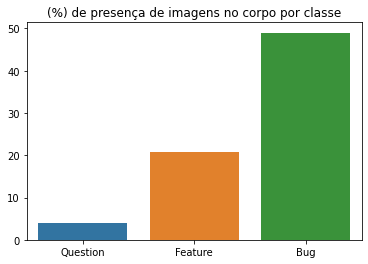

In [7]:
sns.barplot(['Question', 'Feature', 'Bug'], [final_percentage_question, final_percentage_feature, final_percentage_bug])
plt.title('(%) de presença de imagens no corpo por classe')
plt.show()

In [8]:
print(f'{final_percentage_bug}% das Issues que possuem imagens no corpo são Bugs!\n')
print(f'{final_percentage_feature}% das Issues que possuem imagens no corpo são Features!\n')
print(f'{final_percentage_question}% das Issues que possuem imagens no corpo são Questions!\n')

49.0% das Issues que possuem imagens no corpo são Bugs!

20.7% das Issues que possuem imagens no corpo são Features!

3.9% das Issues que possuem imagens no corpo são Questions!



#### RQ 03. Qual é a mediana da quantidade de palavras do corpo de BUG e NÃO-BUG?

In [9]:
df['message-size'] = df['body'].apply(lambda x: len(x))

In [10]:
body_size_median_bugs = df.groupby('label')['message-size'].median().sort_values()

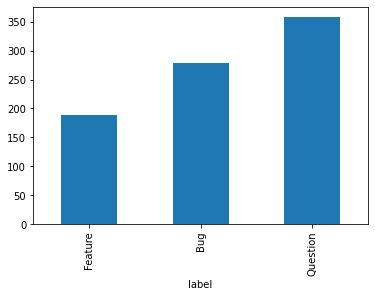

In [11]:
body_size_median_bugs.plot(kind='bar')

#### RQ 04. Quais são as 10 palavras mais frequentes em BUGs?

In [12]:
# Função para remover "stopwords", dígitos, e pontuação

def text_cleansing(df: pd.DataFrame, column_name: str):
    custom_pipeline = [hero.preprocessing.lowercase,
                       hero.preprocessing.remove_digits,
                       hero.preprocessing.remove_punctuation,
                       hero.remove_stopwords,
                       hero.remove_whitespace]

    return hero.clean(df[column_name], custom_pipeline)

In [13]:
# Juntando as duas colunas de texto em uma só

df['text'] = df['title'] + ' ' + df['body']

In [14]:
# Fazendo a limpeza do texto

df['text'] = text_cleansing(df, 'text')

In [15]:
# função para selecionar as `n` palavras mais frequentes

def collect_n_most_frequent_words(df: pd.DataFrame, column: str, n: int):
    if n < 0: return {}
    return pd.Series(' '.join(df[column]).lower().split()).value_counts()[:n].to_dict()

In [16]:
bugs_df = df[df['text'].str.contains('bug|bugs', flags=re.IGNORECASE, regex=True)]
top_10 = collect_n_most_frequent_words(bugs_df, 'text', 10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



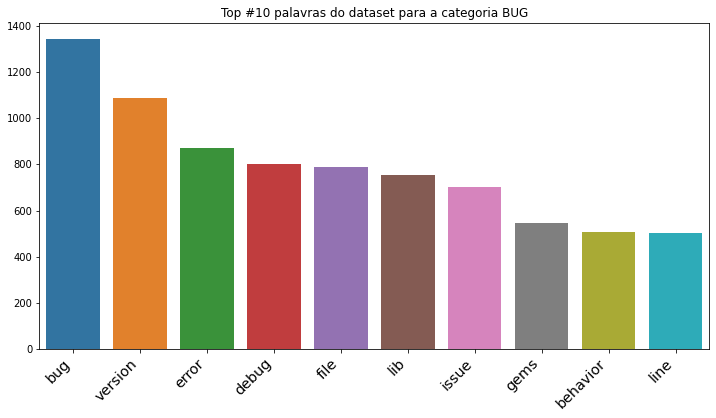

In [17]:
# plotando a informação em um gráfico

plt.figure(figsize=(12,6))

chart = sns.barplot(
    list(top_10.keys()), 
    list(top_10.values())
).set_title('Top #10 palavras do dataset para a categoria BUG')

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.show()

#### RQ 05. Qual é a mediana da similaridade entre os títulos de BUGs e NÃO-BUGS?

In [18]:
# Separando o dataframe em dois: bugs e não bugs

bug_df_titles = df[df['label'] == 'Bug']['title'].reset_index(drop=True)
non_bug_df_titles = df[df['label'] != 'Bug']['title'].reset_index(drop=True)

In [19]:
# Construindo um dataframe para comparação dos títulos

compare_df = pd.concat([bug_df_titles,non_bug_df_titles], axis=1, ignore_index=True)
compare_df.columns = ['bug', 'non-bug']

In [20]:
# Função para calcular a similaridade entre duas strings

def calculate_similarity(str_1, str_2):
  return jellyfish.levenshtein_distance(str_1, str_2)

In [21]:
# Calculando a mediana de similaridade entre os títulos
# Na Distância Levenshtein, similaridade é igual ao número de edições necessárias para tornar as duas strings idênticas

compare_df['similarity'] = compare_df.head(10).apply(lambda x: calculate_similarity(x['bug'], x['non-bug']), axis=1)

similarity_median = compare_df.similarity.median()

In [22]:
# Imprimindo o resultado

print(f'A mediana da similaridade entre os títulos de Bugs e Não Bugs é de: {similarity_median}')

A mediana da similaridade entre os títulos de Bugs e Não Bugs é de: 53.5


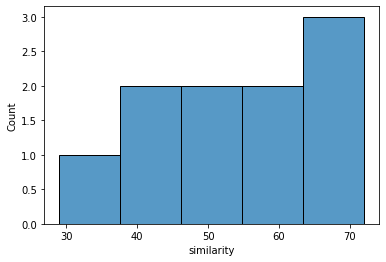

In [23]:
# Visualizando a distribuição de similaridade

sns.histplot(data=compare_df, x='similarity')